Q1. Many user log in and view the chat without commenting.
which users spent the most time in the logs?(3pts) Which users logged in the most(2pts)

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

f = open('hackers.log',encoding='latin1')
data = f.read()
f.close()
print(data[:6000])

--- Log opened Tue Sep 20 00:01:49 2016
00:01 -!- Guest40341 [AndChat2541@AN-pl0gl1.8e2d.64f9.r226rd.IP] has quit [Quit: Bye]
00:11 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has joined #hackers
00:14 -!- Gilgamesh [Gilgamesh@AN-nkf.mv0.se355c.IP] has joined #hackers
00:15 -!- _CyBruh_ [-Cybruh@AN-gm6.oj9.rj1tv4.IP] has quit [Quit: Leaving]
00:20 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has quit [Quit: Leaving]
00:25 < ice231> anyone good with exploiting cisco asa with extrabacon?
00:27 < ice231> we need help with an op but were stuck at this one part
00:27 -!- Bobseviltwin [steven@stupid.hunkey.monkey] has quit [Ping timeout: 121 seconds]
00:30 -!- Gilgamesh [Gilgamesh@AN-nkf.mv0.se355c.IP] has quit [Quit: Leaving]
00:30 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has joined #hackers
00:34 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has quit [Quit: Leaving]
00:34 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has joined #hackers
00:35 -!- Anonymous5 [Anonymous5@AN-tu4.e85.r2ddjo.IP] has joined #hackers


In [2]:
import re
pattern = re.compile(r"^[0-9]{1,2}:[0-9]{1,2} -!- .* \[.+@.+\] ")
users = []
for line in data.split("\n"):
    d=re.findall(pattern,line)
    if d :
        try :
            name,username = d[0][10:].split()
            username = re.sub(r'\[|\]','',username)
            users.append([name,username])
        except:
            pass


In [3]:
df = pd.DataFrame(users,columns=['Name','Username'])

In [4]:
df.shape

(228000, 2)

In [5]:
df.head()

,Name,Username
0,Guest40341,AndChat2541@AN-pl0gl1.8e2d.64f9.r226rd.IP
1,peejr,peeejr@AN-sru.3ib.ec0efc.IP
2,Gilgamesh,Gilgamesh@AN-nkf.mv0.se355c.IP
3,_CyBruh_,-Cybruh@AN-gm6.oj9.rj1tv4.IP
4,peejr,peeejr@AN-sru.3ib.ec0efc.IP


# plotting to 20 Most common user in chat

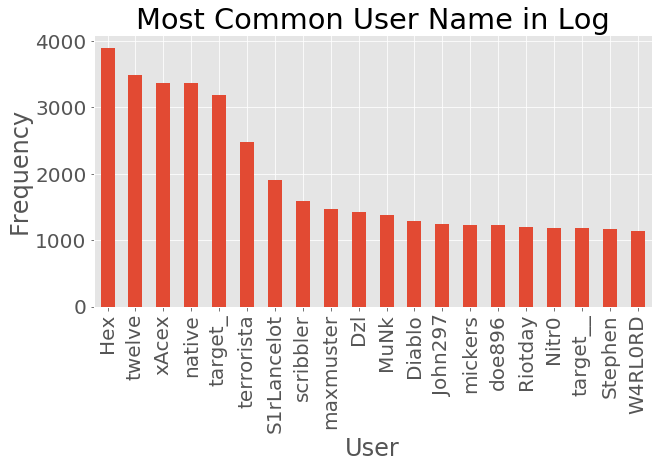

In [6]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Most Common User Name in Log')
ax.set_xlabel("User")
ax.set_ylabel("Frequency")
df['Name'].value_counts()[:20].plot(kind='bar',ax=ax)
plt.show()

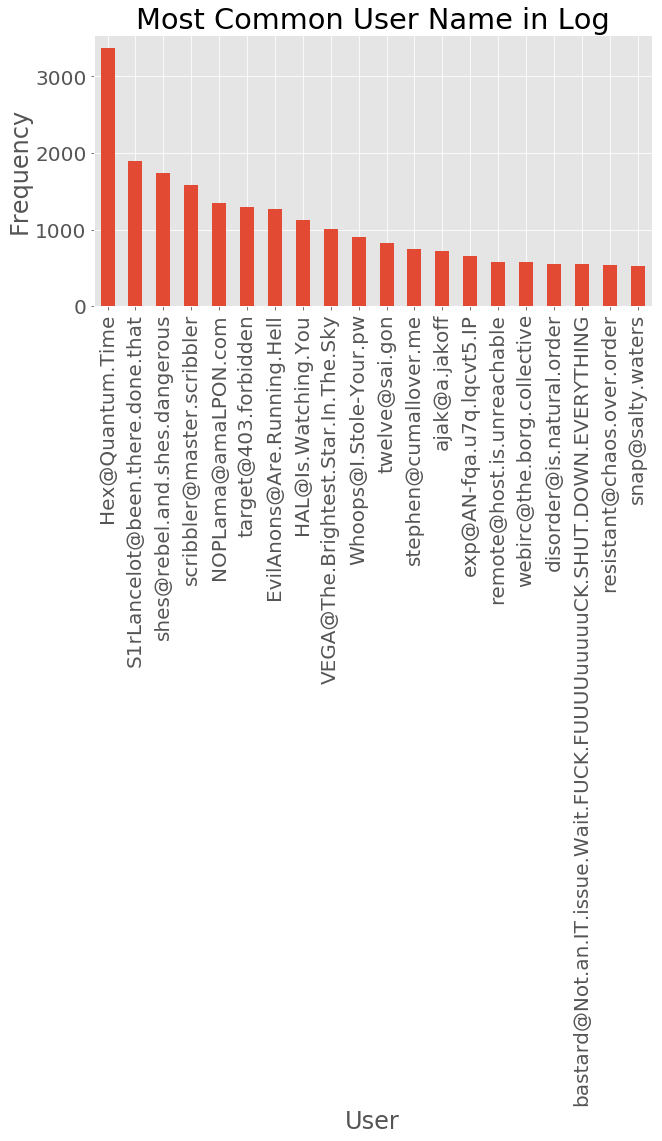

In [7]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Most Common User Name in Log')
ax.set_xlabel("User")
ax.set_ylabel("Frequency")
df['Username'].value_counts()[:20].plot(kind='bar',ax=ax)
plt.show()

# Q2. Find the Most common words(3pts)


### ### lets find Most common World

In [8]:
f = open('hackers.log',encoding='latin1') # reading log file
data = f.read()
raw_data = data.split() # spliting data from space so that we have word list

In [9]:
import pandas as pd # importing necessary libraries for processing 
import numpy as np 

s = pd.Series(raw_data) # createing a Series Object from string to process it quickly and efficiently
# as well as Pandas series provides us many functionaities as we can group, count or plot data

In [10]:
s.value_counts()[:20] # value count willl count each word's repetation than we are slicing to 20 most comman words oly 

-!-            246910
has            230814
<              170074
#hackers       119392
joined         114639
quit           109590
to              41055
a               40354
[Quit:          38620
timeout:        37437
121             37410
seconds]        37227
[Ping           37195
and             35808
the             35491
is              34683
closed]         32785
<+evilbot>      30725
-               29510
[Connection     29238
dtype: int64

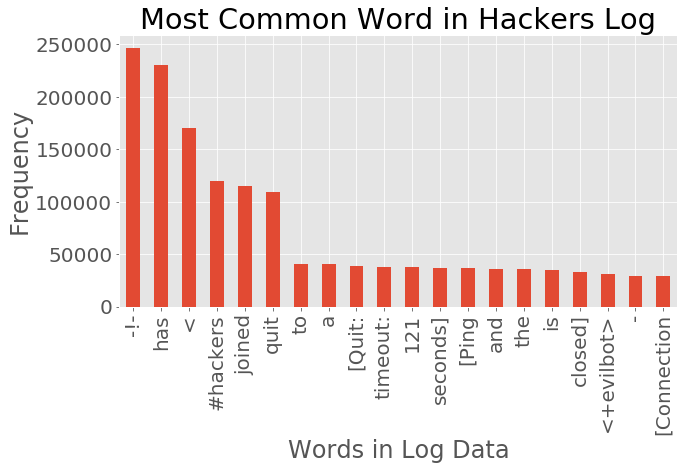

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_title("Most Common Word in Hackers Log")
ax.set_xlabel("Words in Log Data")
ax.set_ylabel("Frequency")
s.value_counts()[:20].plot(kind='bar',ax=ax) # plotting 20 most comman words 
plt.show()

# Conclusion 
*above figure we can see the most common word is -!- but we don't count is has no sense as has V also doesnot have sense

 ####    most Common Words is # hackers
 
 #### second most common word is joined
 
 #### third most common word is quit
 
*we will not include quit to a [Quit as words  then

#### timeout is fourth most common word

###### others are seconds ,ping ,closed , <+evilbot > and [connection]

# Processing Data without Stop Words
 

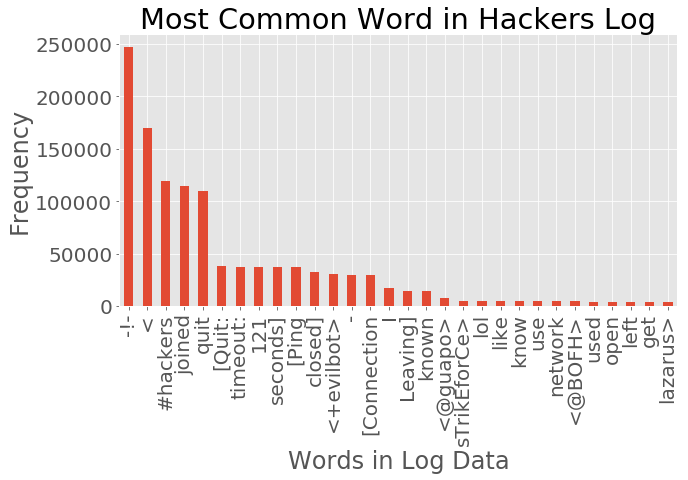

In [12]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
stop_words = stopwords.words('english')
f = open('hackers.log',encoding='latin')
data = f.read().split()
new_data = pd.Series([ word for word in data if word not in stop_words])
word_freq = new_data.value_counts()
# 30 most Common Words 
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_title("Most Common Word in Hackers Log")
ax.set_xlabel("Words in Log Data")
ax.set_ylabel("Frequency")
word_freq[:30].plot(kind='bar',ax=ax)
plt.show()

## Q3. Count the total number of messeage(only those with actual test content) (2pts).Summarize the yusers that posted the most messege (2pts) 

In [13]:
f = open('hackers.log',encoding='latin1')
data = f.read()
f.close()
print(data[:10000])

--- Log opened Tue Sep 20 00:01:49 2016
00:01 -!- Guest40341 [AndChat2541@AN-pl0gl1.8e2d.64f9.r226rd.IP] has quit [Quit: Bye]
00:11 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has joined #hackers
00:14 -!- Gilgamesh [Gilgamesh@AN-nkf.mv0.se355c.IP] has joined #hackers
00:15 -!- _CyBruh_ [-Cybruh@AN-gm6.oj9.rj1tv4.IP] has quit [Quit: Leaving]
00:20 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has quit [Quit: Leaving]
00:25 < ice231> anyone good with exploiting cisco asa with extrabacon?
00:27 < ice231> we need help with an op but were stuck at this one part
00:27 -!- Bobseviltwin [steven@stupid.hunkey.monkey] has quit [Ping timeout: 121 seconds]
00:30 -!- Gilgamesh [Gilgamesh@AN-nkf.mv0.se355c.IP] has quit [Quit: Leaving]
00:30 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has joined #hackers
00:34 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has quit [Quit: Leaving]
00:34 -!- peejr [peeejr@AN-sru.3ib.ec0efc.IP] has joined #hackers
00:35 -!- Anonymous5 [Anonymous5@AN-tu4.e85.r2ddjo.IP] has joined #hackers


In [14]:
pattern = r"[0-9]{0,2}:[0-9]{0,2}.*<.*>.*"
lines = []
for line in data.split('\n') : 
    d = re.findall(pattern,line)
    if d : 
        lines.append(d[0])

In [15]:
lines[:5000]

['00:25 < ice231> anyone good with exploiting cisco asa with extrabacon?',
 '00:27 < ice231> we need help with an op but were stuck at this one part',
 '01:17 < HeavenGuard> hello?',
 '01:17 <+nemecy> hi',
 '01:23 < ice231> hi',
 "02:55 < Ctrl> Do any of you know any trusted services that provide offshore dedicated servers in countries like Iran, Russia, China, etc, that won't bend at pressure from LE",
 '02:56 < Ctrl> And take bitcoin obviously ',
 '03:50 < cryptomillz> #tutorials',
 '03:51 < Winston> /join #tutorials',
 '03:51 < Winston> do that cryptomillz ^^^',
 '04:15 < cryptomillz> i cant find tutorials on the list',
 '04:16 < cryptomillz> found it',
 '06:32 < UnknownError> Wat ap my bois',
 '07:23 < Freak> Anyone got a good dork for SQLi?',
 '07:40 < sTrikEforCe> i am a giant drunk dork!',
 '09:09 <+nemecy> hi',
 '09:10 < inity13> o/',
 '10:19 <+nemecy> http://i.imgur.com/PoCjYqQ.png',
 '10:53 < maxmuster> ?',
 '10:53 < maxmuster> why',
 '10:55 < CrazyAtom> cause',
 '11:02 < max

In [16]:
messages = '\n'.join(lines)

In [17]:
len(data.split('\n'))

478905

In [18]:
messages[:1000]

"00:25 < ice231> anyone good with exploiting cisco asa with extrabacon?\n00:27 < ice231> we need help with an op but were stuck at this one part\n01:17 < HeavenGuard> hello?\n01:17 <+nemecy> hi\n01:23 < ice231> hi\n02:55 < Ctrl> Do any of you know any trusted services that provide offshore dedicated servers in countries like Iran, Russia, China, etc, that won't bend at pressure from LE\n02:56 < Ctrl> And take bitcoin obviously \n03:50 < cryptomillz> #tutorials\n03:51 < Winston> /join #tutorials\n03:51 < Winston> do that cryptomillz ^^^\n04:15 < cryptomillz> i cant find tutorials on the list\n04:16 < cryptomillz> found it\n06:32 < UnknownError> Wat ap my bois\n07:23 < Freak> Anyone got a good dork for SQLi?\n07:40 < sTrikEforCe> i am a giant drunk dork!\n09:09 <+nemecy> hi\n09:10 < inity13> o/\n10:19 <+nemecy> http://i.imgur.com/PoCjYqQ.png\n10:53 < maxmuster> ?\n10:53 < maxmuster> why\n10:55 < CrazyAtom> cause\n11:02 < maxmuster> https://vid.pr0gramm.com/2015/08/28/8a9af1793785d29e.mp4

So There are total 229670 messages with actual text Content out of 478905 lines of text available in log file

In [19]:
pat = re.compile('<.*>')

In [20]:
k = re.findall(pat,messages)

In [21]:
len(k)

229670

In [22]:
s = pd.Series(data=k)
s = s.apply(lambda x:x[1:-1].strip())

In [23]:
s.head()

0         ice231
1         ice231
2    HeavenGuard
3        +nemecy
4         ice231
dtype: object

In [24]:
s.tail()

229665         hypnotic
229666         hypnotic
229667    +Cogitabundus
229668    +Cogitabundus
229669             DeTH
dtype: object

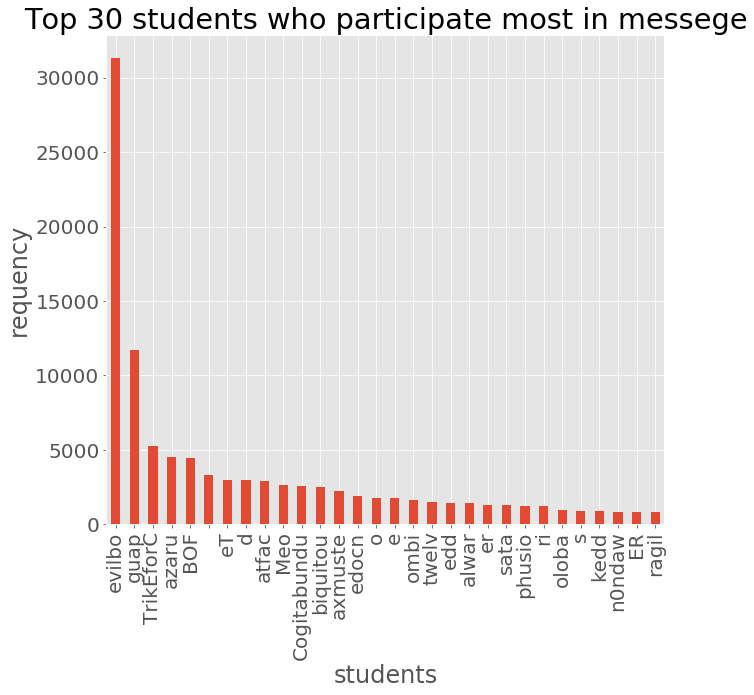

In [25]:
plt.rcParams['font.size'] = 20
fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(1,1,1)
plt.title("Top 30 students who participate most in messege")
plt.xlabel("students")
plt.ylabel("requency")
s = s.apply(lambda x:x[1:-1])
s.value_counts()[:30].plot(kind='bar',ax=ax)
plt.show()

So most of the messages are send by +evilbot than @guapo, sTriKEforCe, @BOFH and other common user who send most messages are lazarus, DeTH, catface, dd and so on ...¶

# Q.4 Find and rank (by count) words not in an English dictionary (3 pts). This is a simple method that can identify some names of malware tools

In [26]:
import pandas as pd
import numpy as np
df = pd.read_csv('english_words.csv',sep='\t',header=None)
df.head()
df.drop(1,axis=1,inplace=True)
print(df.shape)
df.head()

(333333, 1)


,0
0,the
1,of
2,and
3,to
4,a


In [27]:
word_list = df.to_dict()[0]

In [40]:
english_words = list(word_list.values())

In [29]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [30]:
from nltk.corpus import wordnet
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
example_sent = "This is a sample sentence, showing off the stop words filtration."
  
stop_words = set(stopwords.words('english')) 
  

def check_english_word(word):
    word = word.lower()
    if not wordnet.synsets(word):
        #Not an English Word
        p = re.compile(r".*[0-9]{0,2}:[0-9]{0,2}.*")
        p1 = re.compile(r".*-!-.*")
        p2 = re.compile(r".*<|>.*")
        p3 = re.compile(r".*\s.*")
        p4 = re.compile(r"[0-9]*")
        p5 = re.compile(r".*\[|\].*")
        p6 = re.compile(r".*@.*")
        pat = re.findall(p,word)
        pat1 = re.findall(p1,word)
        pat2 = re.findall(p2,word)
        pat3 = re.findall(p3,word)
        pat4 = re.findall(p4,word)
        pat5 = re.findall(p5,word)
        pat6 = re.findall(p6,word)
        
        if any([pat,pat1,pat2,pat5,pat3]): 
            return np.nan
        elif word in stop_words : 
            return np.nan
        elif word.isidentifier : 
            return word
        else  : 
            return np.nan
    else:
        #English Word
        return np.nan


In [31]:
str.isidentifier

<method 'isidentifier' of 'str' objects>

In [32]:
f = open('hackers.log',encoding='latin1')
data = f.read()
f.close()


In [33]:
messages = '\n'.join(lines)
data = messages.split('\n')

In [34]:
data = ' '.join(data)

In [35]:
data = data.split()

In [36]:
series = pd.Series(data)

In [37]:
no_english_words = series.apply(check_english_word)

In [38]:
no_english_words.dropna(inplace=True)

In [39]:
no_english_words.value_counts()[:1130]

-              28435
lol             5758
?               3810
im              3207
sql             2791
could           2682
would           2671
perl            2540
dont            2469
i'm             2415
anyone          1895
something       1635
/               1624
nmap            1581
hey             1537
login           1503
-tools          1433
thats           1425
sqlmap          1405
that's          1400
pentesting      1394
wireshark       1362
nikto           1332
aircrack-ng     1317
wordpress       1313
wep             1301
vpn             1299
dsniff          1297
wpscan          1283
,               1276
               ...  
bsd               25
companies,        25
else?             25
gdb               25
hey!              25
whenever          25
(3))              25
-nipper           25
he'll             25
said.             25
tool.             25
whoa              25
win10             25
need?             25
name,             25
lulzsec           25
-nikto       

In [51]:
no_english_words.iloc[12]

'#tutorials'

In [52]:
no_english_words.shape

(340134,)

In [ ]:
e

In [ ]:
n = no_english_words.apply(lambda word : word if word.strip() not in english_words else np.nan)

In [ ]:
p = n.dropna()

In [ ]:
n.shape

In [ ]:
p.shape()

In [ ]:
pat ='[0-9]*'
s = '    123  '
k = re.match(pat,s)
sum(k.span())